In [17]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import  train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load data set
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [7]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [33]:
df=df.sample(frac=0.3,random_state=1)
df.shape

(8544, 31)

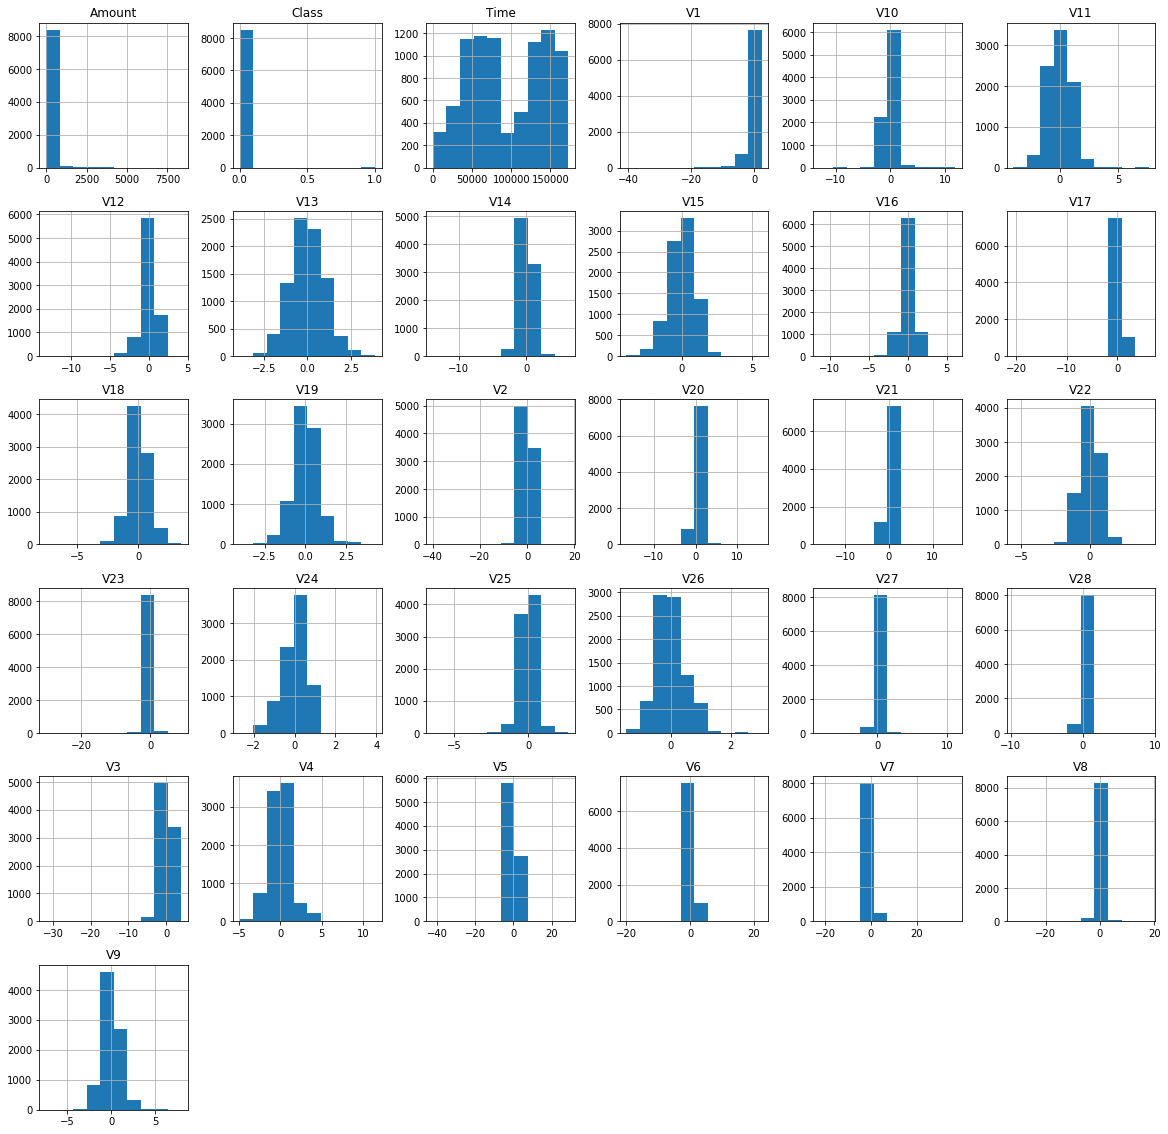

In [34]:
df.hist(figsize=(20,20))
plt.show()

In [35]:
#determine number of frod cases in dataset
Fraud=df[df['Class']==1]
Valid=df[df['Class']==0]
outlier_fraction=len(Fraud)/float(len(Valid))
print(outlier_fraction)
print("Frad Cases: {}".format(len(Fraud)))
print("Valid Cases:{}".format(len(Valid)))

0.0014064697609001407
Frad Cases: 12
Valid Cases:8532


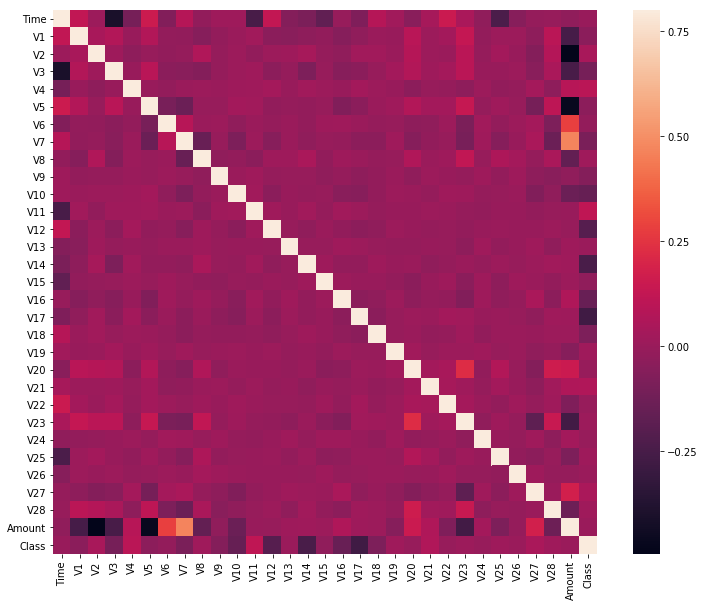

In [36]:
corrmat=df.corr()
fig=plt.figure(figsize=(13,10))
sns.heatmap(corrmat,vmax=.8 ,square=True)
plt.show()

In [37]:
columns=df.columns.tolist()
columns=[c for c in columns if c not in ["Class"] ]

target="Class"
X=df[columns]
Y=df[target]
print(X.shape)
print(Y.shape)

(8544, 30)
(8544,)


In [38]:
from sklearn.metrics import  classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import  LocalOutlierFactor

In [39]:
#define a random state
state=1

#define the outlier detiction methods
classifiers={
    "IsolationForest": IsolationForest(max_samples=len(X),contamination=outlier_fraction,random_state=state),
    "LocalOutlierFactor": LocalOutlierFactor( n_neighbors=20,
                                            contamination=outlier_fraction)
    
}

In [40]:
#fit the moel
n_outliers=len(Fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    #fit the ddata and tag outliers
    if clf_name=="LocalOutlierFactor":
        y_pred=clf.fit_predict(X)
        scores_pred=clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
        
    #reshape the prediction value to 0 for valid ,1 for frod
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    
    n_errors=(y_pred!=Y).sum()
    
    #rum classification metrics
    print('{} : {} '.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))


IsolationForest : 21 
0.9975421348314607
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8532
          1       0.15      0.17      0.16        12

avg / total       1.00      1.00      1.00      8544

LocalOutlierFactor : 25 
0.9970739700374532
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8532
          1       0.00      0.00      0.00        12

avg / total       1.00      1.00      1.00      8544

